### 演習
1. 以下の透過画像(12-13-ex1.png)における，R要素値，G要素値，B要素値，透過度のヒストグラムを作成しなさい

<img src="fig/12-13-ex1.png" width="33%">

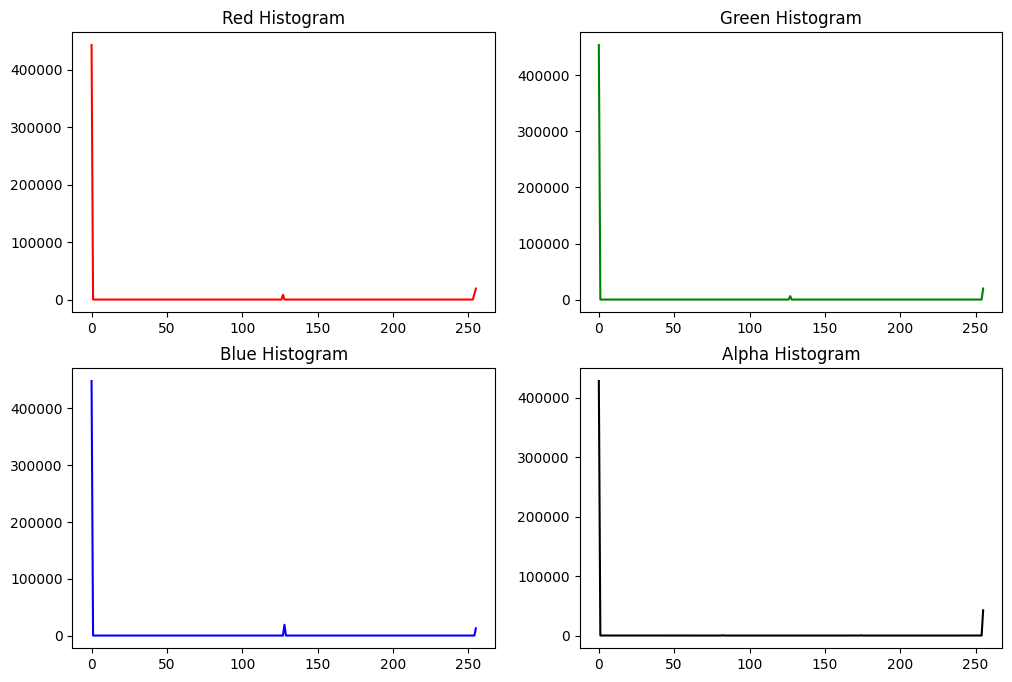

In [1]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('12-13-ex1.png', -1) # 透過付き画像の読み込み
image = cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA) # BGRA → RGBA

# RGBA形式なので
red = image[:,:,0]
green = image[:,:,1]
blue = image[:,:,2]
alpha = image[:,:,3]

plt.figure(figsize=(12, 8)) # 横10インチ，縦8インチ

plt.subplot(221)
red_hist = cv2.calcHist([red], [0], None, [256], [0,256])
plt.title('Red Histogram')
plt.plot(red_hist, color='r')

plt.subplot(222)
green_hist = cv2.calcHist([green], [0], None, [256], [0,256])
plt.title('Green Histogram')
plt.plot(green_hist, color='g')

plt.subplot(223)
blue_hist = cv2.calcHist([blue], [0], None, [256], [0,256])
plt.title('Blue Histogram')
plt.plot(blue_hist, color='b')

plt.subplot(224)
alpha_hist = cv2.calcHist([alpha], [0], None, [256], [0,256])
plt.title('Alpha Histogram')
plt.plot(alpha_hist, color='k')

plt.show()

2. 以下の画像2つに対して，アルファブレンディングを行いなさい（ただし，αの値が0.1, 0.3, 0.5，0.7，0.9の5種類の結果を縦1列に表示すること）

- 入力画像1: 12-13-ex2a.jpg

<img src="fig/12-13-ex2a.jpg" width="33%">

- 入力画像2: 12-13-ex2b.jpg

<img src="fig/12-13-ex2b.jpg" width="33%">


True


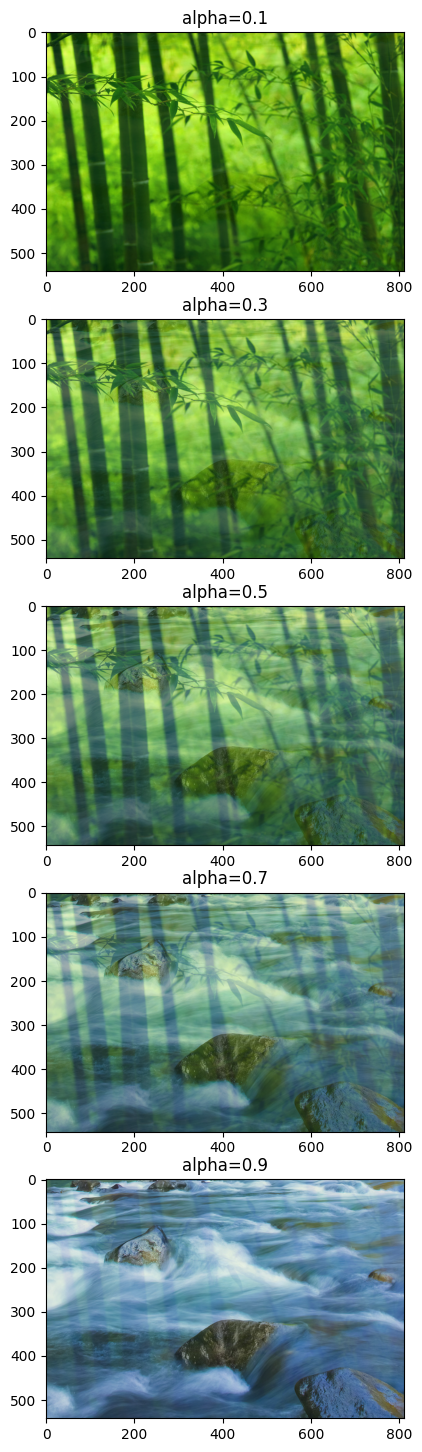

In [2]:
import cv2
import matplotlib.pyplot as plt

image1 = cv2.imread('12-13-ex2a.jpg')
image2 = cv2.imread('12-13-ex2b.jpg')

# サイズチェック
print(image1.shape == image2.shape)

# BGR → RGB
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 18)) # 横10インチ，縦8インチ

alpha = 0.1
blend_image = cv2.addWeighted(image1, alpha, image2, 1 - alpha, 0)
plt.subplot(511)
plt.title('alpha=0.1')
plt.imshow(blend_image)

alpha = 0.3
blend_image = cv2.addWeighted(image1, alpha, image2, 1 - alpha, 0)
plt.subplot(512)
plt.title('alpha=0.3')
plt.imshow(blend_image)

alpha = 0.5
blend_image = cv2.addWeighted(image1, alpha, image2, 1 - alpha, 0)
plt.subplot(513)
plt.title('alpha=0.5')
plt.imshow(blend_image)

alpha = 0.7
blend_image = cv2.addWeighted(image1, alpha, image2, 1 - alpha, 0)
plt.subplot(514)
plt.title('alpha=0.7')
plt.imshow(blend_image)

alpha = 0.9
blend_image = cv2.addWeighted(image1, alpha, image2, 1 - alpha, 0)
plt.subplot(515)
plt.title('alpha=0.9')
plt.imshow(blend_image)

plt.show()

3. 以下の画像2つに対して，クロマキー合成を行いなさい（ただし，12-13-ex3a.jpgの人物の画素値を，12-13-ex3b.jpgの空に合成すること）

- 入力画像1: 12-13-ex3a.jpg

<img src="fig/12-13-ex3a.jpg" width="33%">

- 入力画像2: 12-13-ex3b.jpg

<img src="fig/12-13-ex3b.jpg" width="33%">

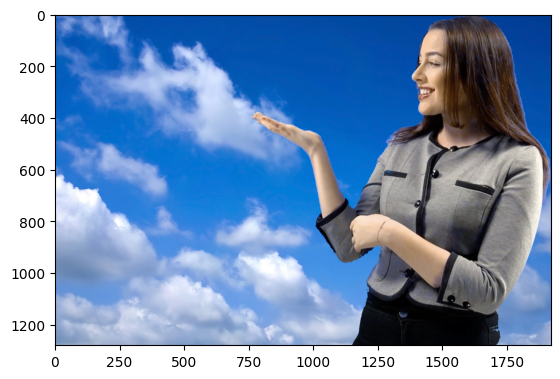

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image1 = cv2.imread('12-13-ex3a.jpg')
image2 = cv2.imread('12-13-ex3b.jpg')

# BGR → HSV
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2HSV)
# BGR → RGB
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# 青色を抜き出すマスクを作る（数値は手作業で求める）
min = np.array([90, 50, 50], np.uint8)
max = np.array([110, 255, 255], np.uint8)
mask1 = cv2.inRange(image1, min, max)
mask2 = cv2.bitwise_not(mask1)

# HSVをRGBに戻す処理を行う
image1 = cv2.cvtColor(image1, cv2.COLOR_HSV2RGB)

# マスク処理を行う
after_image1 = cv2.bitwise_and(image1, image1, mask=mask2)
after_image2 = cv2.bitwise_and(image2, image2, mask=mask1)

# クロマキー合成を作る
after_image3 = after_image1 + after_image2

# クロマキー合成を表示する
plt.imshow(after_image3)
plt.show()